In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
sales_df = pd.read_csv('sales.csv')

In [3]:
sales_df.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [4]:
# Examining the data of state_holiday for unique values and NaNs

print(sales_df['state_holiday'].unique())

print(sales_df['state_holiday'].isnull().sum())

# We can convert the state_holiday feature from object to integer to be numerical

state_holiday_mapping = {'0': 0, 'a': 1, 'b': 2, 'c': 3}
sales_df['state_holiday_encoded'] = sales_df['state_holiday'].map(state_holiday_mapping)

# Now we can drop the original column with data type object

sales_df = sales_df.drop(columns=['state_holiday'])



['0' 'a' 'c' 'b']
0


In [5]:
print(sales_df.head())

print(sales_df.dtypes)

   Unnamed: 0  store_ID  day_of_week        date  nb_customers_on_day  open  \
0      425390       366            4  2013-04-18                  517     1   
1      291687       394            6  2015-04-11                  694     1   
2      411278       807            4  2013-08-29                  970     1   
3      664714       802            2  2013-05-28                  473     1   
4      540835       726            4  2013-10-10                 1068     1   

   promotion  school_holiday  sales  state_holiday_encoded  
0          0               0   4422                      0  
1          0               0   8297                      0  
2          1               0   9729                      0  
3          1               0   6513                      0  
4          1               0  10882                      0  
Unnamed: 0                int64
store_ID                  int64
day_of_week               int64
date                     object
nb_customers_on_day       int64

In [6]:
print(sales_df['state_holiday_encoded'].unique())

[0 1 3 2]


In [7]:
# Examining the data of date for unique values and NaNs

print(sales_df['date'].unique())

print(sales_df['date'].isnull().sum())

# We need to convert the values in date to integers only representing the month

# Convert 'date' column to datetime format
sales_df['date'] = pd.to_datetime(sales_df['date'])

# Extract the month as an integer
sales_df['month'] = sales_df['date'].dt.month

# Optional: Drop the original 'date' column if it's no longer needed
sales_df = sales_df.drop(columns=['date', 'Unnamed: 0'])


# Display the updated DataFrame
print(sales_df.head())


['2013-04-18' '2015-04-11' '2013-08-29' '2013-05-28' '2013-10-10'
 '2013-03-19' '2014-06-08' '2014-07-16' '2013-05-11' '2013-06-25'
 '2014-10-05' '2014-03-28' '2014-09-27' '2013-05-21' '2013-07-01'
 '2013-12-18' '2015-06-10' '2015-03-28' '2013-01-27' '2015-05-06'
 '2014-06-12' '2014-05-10' '2014-12-27' '2015-02-18' '2014-02-17'
 '2013-09-18' '2013-06-19' '2014-06-30' '2014-06-06' '2015-07-29'
 '2014-05-15' '2014-12-06' '2015-03-09' '2015-05-05' '2014-03-09'
 '2013-10-18' '2015-04-25' '2015-03-04' '2013-08-18' '2015-06-19'
 '2013-10-28' '2014-04-19' '2013-01-15' '2013-10-06' '2015-02-10'
 '2014-01-08' '2014-06-26' '2013-11-13' '2014-04-22' '2013-09-01'
 '2013-11-09' '2014-11-19' '2014-03-07' '2015-03-27' '2015-02-01'
 '2014-12-15' '2013-02-24' '2013-03-17' '2013-04-24' '2015-03-16'
 '2013-07-31' '2015-05-29' '2013-03-21' '2015-05-21' '2013-01-30'
 '2015-02-23' '2014-04-25' '2013-07-25' '2015-07-01' '2013-11-03'
 '2014-06-28' '2014-01-06' '2014-08-12' '2014-08-23' '2013-05-06'
 '2013-01-

In [8]:
# We also need to check for NaNs in other columns

print(sales_df.isnull().sum())

store_ID                 0
day_of_week              0
nb_customers_on_day      0
open                     0
promotion                0
school_holiday           0
sales                    0
state_holiday_encoded    0
month                    0
dtype: int64


In [9]:
# drop unnamed column

                 Feature  Importance
2    nb_customers_on_day    0.783791
4              promotion    0.097911
0               store_ID    0.029979
1            day_of_week    0.026526
3                   open    0.025686
7                  month    0.019347
6  state_holiday_encoded    0.010658
5         school_holiday    0.006104


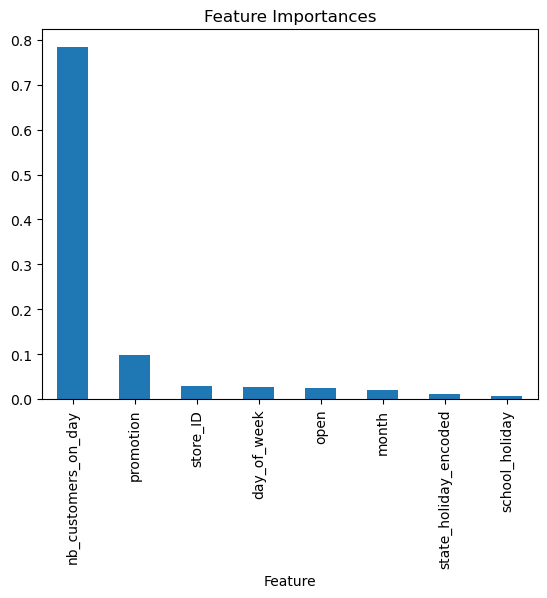

In [10]:
# Now that all features are of data type integers we want to build a xgboost model to assess the importance of features

# Define target and features
target = 'sales' 
features = sales_df[[col for col in sales_df.columns if col != target]]

X = features  
y = sales_df[target] 

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_xgb = xgb.XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)

# Get feature importances
feature_importances = model_xgb.feature_importances_

# Map feature importances to feature names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, title='Feature Importances');

In [11]:
# We are dropping the unnamed column from the data frame since it shows no importance 

sales_df = sales_df.drop(sales_df.columns[0], axis=1)

In [12]:
# We want to evaluate now the predictive performance of the xgboost model



In [13]:
# We want to check for outliers and will use box plot for that

plt.figure(figsize=(12, 6)) 

# Plot a simple boxplot
sns.boxplot(data=sales_df[features.columns])

# Display the plot
plt.show()

KeyError: "['store_ID'] not in index"

<Figure size 1200x600 with 0 Axes>

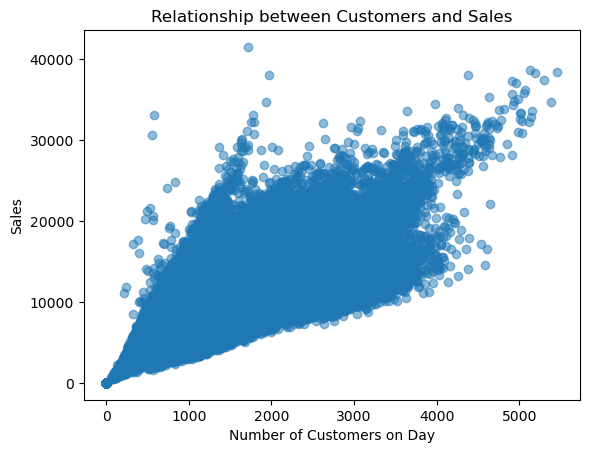

In [14]:
# We want to further analyze the relationship between nb_customers_on_day and sales by drawing a scatter plot

plt.scatter(sales_df['nb_customers_on_day'], sales_df['sales'], alpha=0.5)
plt.xlabel('Number of Customers on Day')
plt.ylabel('Sales')
plt.title('Relationship between Customers and Sales')
plt.show()

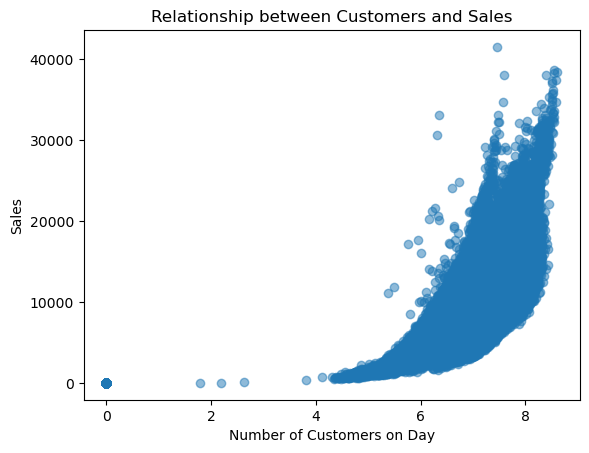

In [15]:
# We want to apply log transformation to the feature nb_customers_on_day to handle outliers

sales_df['log_nb_customers_on_day'] = np.log1p(sales_df['nb_customers_on_day'])

plt.scatter(sales_df['log_nb_customers_on_day'], sales_df['sales'], alpha=0.5)
plt.xlabel('Number of Customers on Day')
plt.ylabel('Sales')
plt.title('Relationship between Customers and Sales')
plt.show()

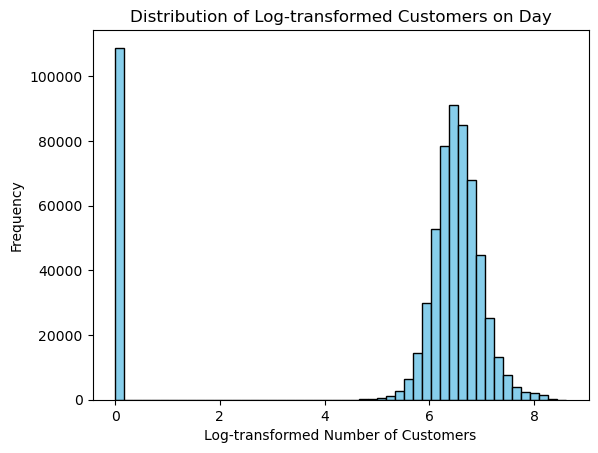

In [16]:
# Plot histogram to check the distribution of the log-transformed feature
plt.hist(sales_df['log_nb_customers_on_day'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Log-transformed Customers on Day')
plt.xlabel('Log-transformed Number of Customers')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Build xgboost model

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model_xgb = xgb.XGBRegressor(random_state=42)

# model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

print(y_pred_xgb)

# Calculate the R² score (coefficient of determination) on the test set
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'R² score: {r2_xgb:.4f}')

[10724.573      -15.378912  4351.233    ... 11165.31      9567.169
  7847.294   ]
R² score: 0.9306


In [18]:
# Build linear regression model to check if it performs better

model_ling = LinearRegression()
model_ling.fit(X_train, y_train)

y_pred_ling = model_ling.predict(X_test)

print(y_pred_ling)

r2_ling = r2_score(y_test, y_pred_ling)
print(f'R² score: {r2_ling:.4f}')


[9705.96700594  -75.78440787 5400.60407234 ... 9802.60711766 8757.3744274
 7568.45798671]
R² score: 0.8512


In [19]:
# Build decision tree regressor

model_dtr = DecisionTreeRegressor(random_state=42)

# Train the model on the training set
model_dtr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtr = model_dtr.predict(X_test)

# Calculate the R² score (coefficient of determination)
r2_dtr = r2_score(y_test, y_pred_dtr)
print(f'Decision Tree Regressor R² score: {r2_dtr:.4f}')


Decision Tree Regressor R² score: 0.9287


In [20]:
# xgboost has the highest accuracy score of all the models so far. We will standardize the feature data and rerun xgboost to check if the score improved

# Initialize the StandardScaler
scaler_standardization = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler_standardization.fit_transform(X_train)
X_test_scaled = scaler_standardization.transform(X_test)

# Initialize the XGBoost Regressor
model_xgb_scaled = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model on the standardized training data
model_xgb_scaled.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb_scaled = model_xgb_scaled.predict(X_test_scaled)

# Calculate R² score
r2_xgb_scaled = r2_score(y_test, y_pred_xgb_scaled)
print(f'XGBoost R² score after standardization: {r2_xgb_scaled:.4f}')


XGBoost R² score after standardization: 0.9306


In [21]:
# Since standardizing the feature data did not yiel a higher r2 score in the xgboost model, we will now try to normalize the data

# Initialize the MinMaxScaler
scaler_normalization = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_normalized = scaler_normalization.fit_transform(X_train)
X_test_normalized = scaler_normalization.transform(X_test)

# Initialize the XGBoost Regressor
model_xgb_norm = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model on the normalized training data
model_xgb_norm.fit(X_train_normalized, y_train)

# Make predictions on the normalized test set
y_pred_xgb_norm = model_xgb_norm.predict(X_test_normalized)

# Calculate R² score
r2_xgb_norm = r2_score(y_test, y_pred_xgb_norm)
print(f'XGBoost R² score after normalization: {r2_xgb_norm:.4f}')

XGBoost R² score after normalization: 0.9306


In [22]:
# Now we need to load the new CSV file with the new data, preprocess it as we did with the sales.csv file and then use our XGBoost Regressor model to predict the values

real_data_df = pd.read_csv('G1.csv')

print(real_data_df.head())

real_data_df.isnull().values.any()

    index  store_ID  day_of_week        date  nb_customers_on_day  open  \
0  272371       415            7  01/03/2015                    0     0   
1  558468        27            7  29/12/2013                    0     0   
2   76950       404            3  19/03/2014                  657     1   
3   77556       683            2  29/01/2013                  862     1   
4  456344       920            3  19/03/2014                  591     1   

   promotion state_holiday  school_holiday  
0          0             0               0  
1          0             0               0  
2          1             0               0  
3          0             0               0  
4          1             0               0  


False

In [23]:
# Convert 'date' column to datetime format

real_data_df['date'] = pd.to_datetime(real_data_df['date'], format='%d/%m/%Y')

# Extract the month as an integer
real_data_df['month'] = real_data_df['date'].dt.month

# Optional: Drop the original 'date' column if it's no longer needed
real_data_df = real_data_df.drop(columns=['date'])

print(real_data_df.head())

    index  store_ID  day_of_week  nb_customers_on_day  open  promotion  \
0  272371       415            7                    0     0          0   
1  558468        27            7                    0     0          0   
2   76950       404            3                  657     1          1   
3   77556       683            2                  862     1          0   
4  456344       920            3                  591     1          1   

  state_holiday  school_holiday  month  
0             0               0      3  
1             0               0     12  
2             0               0      3  
3             0               0      1  
4             0               0      3  


In [24]:
# We can convert the state_holiday feature from object to integer to be numerical

state_holiday_mapping = {'0': 0, 'a': 1, 'b': 2, 'c': 3}
real_data_df['state_holiday_encoded'] = real_data_df['state_holiday'].map(state_holiday_mapping)

# Now we can drop the original column with data type object

real_data_df = real_data_df.drop(columns=['state_holiday'])

print(real_data_df.head())

    index  store_ID  day_of_week  nb_customers_on_day  open  promotion  \
0  272371       415            7                    0     0          0   
1  558468        27            7                    0     0          0   
2   76950       404            3                  657     1          1   
3   77556       683            2                  862     1          0   
4  456344       920            3                  591     1          1   

   school_holiday  month  state_holiday_encoded  
0               0      3                      0  
1               0     12                      0  
2               0      3                      0  
3               0      1                      0  
4               0      3                      0  


In [25]:
# Drop the index column

real_data_df = real_data_df.drop(columns=['index'])

print(real_data_df.head())

   store_ID  day_of_week  nb_customers_on_day  open  promotion  \
0       415            7                    0     0          0   
1        27            7                    0     0          0   
2       404            3                  657     1          1   
3       683            2                  862     1          0   
4       920            3                  591     1          1   

   school_holiday  month  state_holiday_encoded  
0               0      3                      0  
1               0     12                      0  
2               0      3                      0  
3               0      1                      0  
4               0      3                      0  


In [30]:
# Reorder real_data_df to match the correct column order
correct_column_order = ['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion', 'school_holiday', 'state_holiday_encoded', 'month']
real_data_df = real_data_df[correct_column_order]

In [31]:
predict_real_sales = model_xgb.predict(real_data_df)

In [ ]:
finished_df = pd.read_csv('G1.csv')

finished_df['sales'] = predict_real_sales


In [34]:

finished_df.to_csv('G1a.csv', index=False)